In [1]:
import pandas as pd

In [2]:
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

#machine learning libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
#get  dataframe
titanic_df = pd.read_csv("train.csv",dtype={"Age":np.float64},)
test_df = pd.read_csv("test.csv",dtype={"Age":np.float64},)

print titanic_df.head(890).to_string()
#np.shape(titanic_df)
#test_df.head()

     PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                            Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                             Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000             C123        S
4              5         0       3                           Allen, Mr. William Henry    male  35.00      0      0              373450    8.0500 

In [5]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [6]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [7]:
import csv
with open('train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    i=0
    for row in reader:
        if(row['Embarked']=='S' or row['Embarked']=='C' or row['Embarked']=='Q'):
            i+=1
        print(row['Embarked'])
print i
#csvfile.close()

S
C
S
S
S
Q
S
S
S
C
S
S
S
S
S
S
Q
S
S
C
S
S
Q
S
S
S
C
S
Q
S
C
C
Q
S
C
S
C
S
S
C
S
S
C
C
Q
S
Q
Q
C
S
S
S
C
S
C
S
S
C
S
S
C

S
S
C
C
S
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
C
C
S
S
S
S
S
S
S
S
S
S
S
Q
S
C
S
S
C
S
Q
S
C
S
S
S
C
S
S
C
Q
S
C
S
C
S
S
S
S
C
S
S
S
C
C
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
S
S
C
S
S
C
S
S
S
C
S
S
S
S
Q
S
Q
S
S
S
S
S
C
C
Q
S
Q
S
S
S
S
C
S
S
S
C
Q
C
S
S
S
S
Q
C
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
C
Q
S
S
S
S
S
S
S
S
S
C
C
S
C
S
Q
S
S
S
Q
S
S
S
S
S
S
S
S
C
Q
S
S
S
Q
S
Q
S
S
S
S
C
S
S
S
Q
S
C
C
S
S
C
C
S
S
C
Q
Q
S
Q
S
S
C
C
C
C
C
C
S
S
S
S
S
S
S
C
S
S
Q
S
S
C
S
S
S
C
Q
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
C
S
S
S
Q
Q
S
C
C
S
Q
S
C
C
Q
C
C
S
S
C
S
C
S
C
C
S
C
C
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
Q
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
S
S
C
C
S
C
S
S
S
Q
S
S
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
C
S
S
C
S
S
S
S
S
C
S
C
C
S
S
S
S

In [8]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

In [9]:
import csv
with open('train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    i=0
    for row in reader:
        if(row['Embarked']=='S' or row['Embarked']=='C' or row['Embarked']=='Q'):
            i+=1
        print(row['Embarked'])
print i
#csvfile.close()

S
C
S
S
S
Q
S
S
S
C
S
S
S
S
S
S
Q
S
S
C
S
S
Q
S
S
S
C
S
Q
S
C
C
Q
S
C
S
C
S
S
C
S
S
C
C
Q
S
Q
Q
C
S
S
S
C
S
C
S
S
C
S
S
C

S
S
C
C
S
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
C
C
S
S
S
S
S
S
S
S
S
S
S
Q
S
C
S
S
C
S
Q
S
C
S
S
S
C
S
S
C
Q
S
C
S
C
S
S
S
S
C
S
S
S
C
C
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
S
S
C
S
S
C
S
S
S
C
S
S
S
S
Q
S
Q
S
S
S
S
S
C
C
Q
S
Q
S
S
S
S
C
S
S
S
C
Q
C
S
S
S
S
Q
C
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
Q
S
S
C
Q
S
S
S
S
S
S
S
S
S
C
C
S
C
S
Q
S
S
S
Q
S
S
S
S
S
S
S
S
C
Q
S
S
S
Q
S
Q
S
S
S
S
C
S
S
S
Q
S
C
C
S
S
C
C
S
S
C
Q
Q
S
Q
S
S
C
C
C
C
C
C
S
S
S
S
S
S
S
C
S
S
Q
S
S
C
S
S
S
C
Q
S
S
S
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
C
S
S
S
Q
Q
S
C
C
S
Q
S
C
C
Q
C
C
S
S
C
S
C
S
C
C
S
C
C
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
Q
Q
S
S
S
S
S
S
S
C
Q
S
S
S
S
S
S
Q
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
S
S
S
C
C
S
C
S
S
S
Q
S
S
S
S
S
S
S
S
Q
C
S
S
S
C
S
S
S
S
S
S
S
S
S
S
C
S
S
C
S
S
S
S
S
C
S
C
C
S
S
S
S

In [10]:
#titanic_df
print titanic_df.head(890).to_string()

     Survived  Pclass     Sex    Age  SibSp  Parch      Fare            Cabin Embarked
0           0       3    male  22.00      1      0    7.2500              NaN        S
1           1       1  female  38.00      1      0   71.2833              C85        C
2           1       3  female  26.00      0      0    7.9250              NaN        S
3           1       1  female  35.00      1      0   53.1000             C123        S
4           0       3    male  35.00      0      0    8.0500              NaN        S
5           0       3    male    NaN      0      0    8.4583              NaN        Q
6           0       1    male  54.00      0      0   51.8625              E46        S
7           0       3    male   2.00      3      1   21.0750              NaN        S
8           1       3  female  27.00      0      2   11.1333              NaN        S
9           1       2  female  14.00      1      0   30.0708              NaN        C
10          1       3  female   4.00      1

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin    C    Q
0         0       3    male  22.0      1      0   7.2500   NaN  0.0  0.0
1         1       1  female  38.0      1      0  71.2833   C85  1.0  0.0
2         1       3  female  26.0      0      0   7.9250   NaN  0.0  0.0
3         1       1  female  35.0      1      0  53.1000  C123  0.0  0.0
4         0       3    male  35.0      0      0   8.0500   NaN  0.0  0.0
5         0       3    male   NaN      0      0   8.4583   NaN  0.0  1.0
6         0       1    male  54.0      0      0  51.8625   E46  0.0  0.0
7         0       3    male   2.0      3      1  21.0750   NaN  0.0  0.0
8         1       3  female  27.0      0      2  11.1333   NaN  0.0  0.0
9         1       2  female  14.0      1      0  30.0708   NaN  1.0  0.0


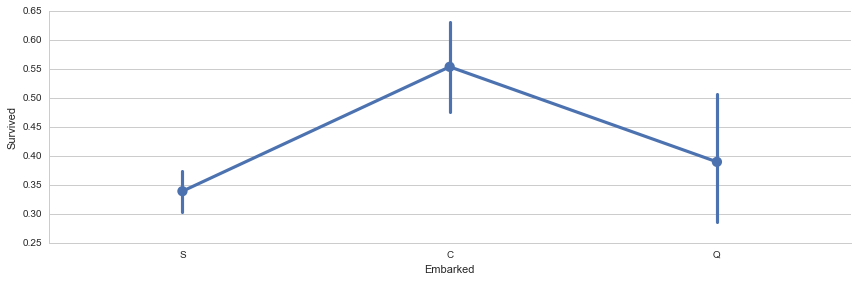

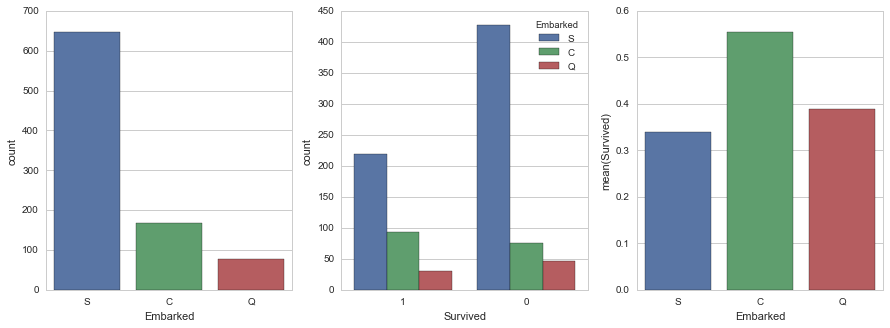

In [11]:
# plot
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
#sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)
print titanic_df.head(10).to_string()

           0
0  21.690346
1  47.991228
           0
0  66.608344
1  31.392191


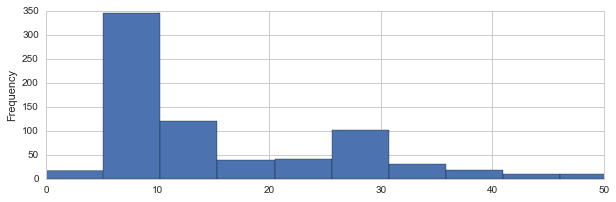

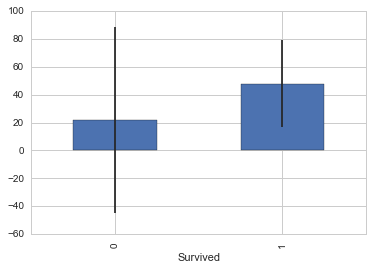

In [12]:
# Fare 
test_df["Fare"].fillna(test_df["Fare"].median(),inplace=True)
#convert from float to int
titanic_df["Fare"] = titanic_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)

#get the fare who survived and not survived
fare_survived = titanic_df['Fare'][titanic_df['Survived']==1]
fare_not_survived = titanic_df['Fare'][titanic_df['Survived']==0]

#take mean and average of the fare who survived and not sutvived

average_fare = DataFrame([fare_not_survived.mean(),fare_survived.mean()])
print average_fare
std_fare = DataFrame([fare_survived.std(),fare_not_survived.std()])  #standard deviation
print std_fare

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(10,3),bins=100, xlim=(0,50))

average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

177


C:\Users\chinesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chinesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


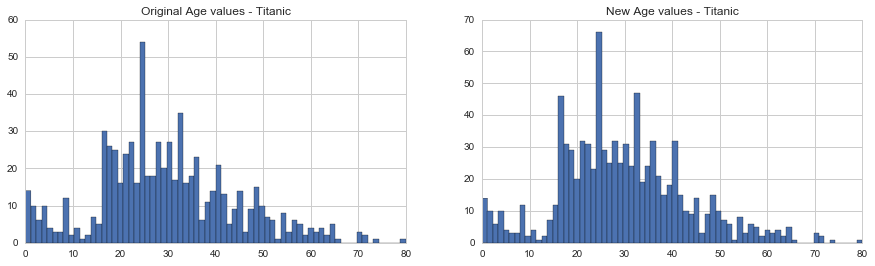

In [13]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

#axis3.set_title('Original Age values - Test')
#axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()
print count_nan_age_titanic

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)
#print rand_2
# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
#test_df['Age'].hist(bins=70, ax=axis4)

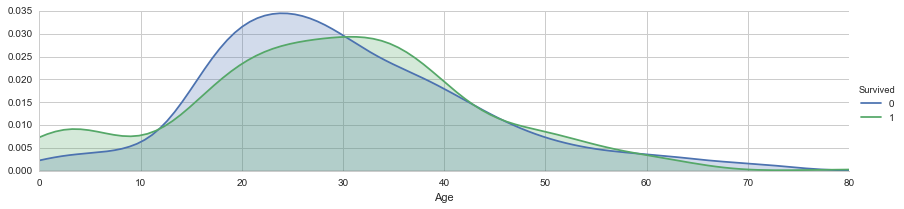

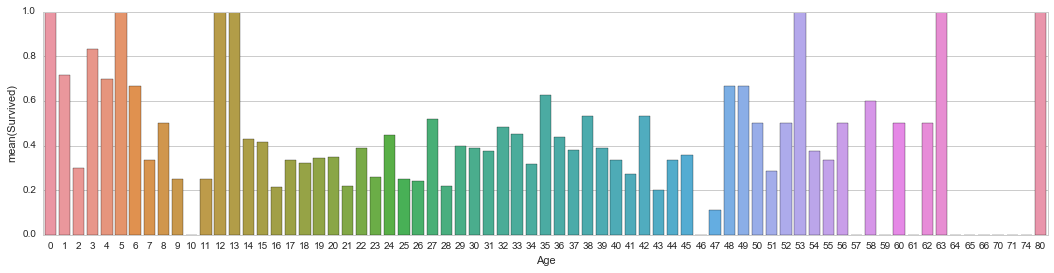

In [14]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [15]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

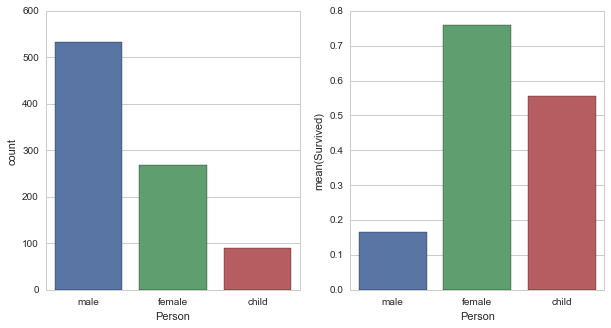

In [16]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

C:\Users\chinesh\Anaconda2\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0xc2a3b70>, <matplotlib.text.Text at 0xcfa7b70>]

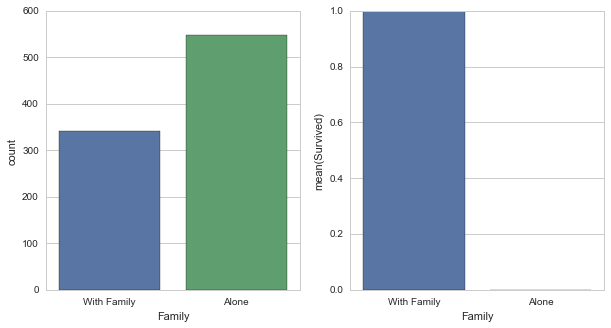

In [17]:
#Family
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.

titanic_df['Family'] = titanic_df["SibSp"] + titanic_df["Parch"]
titanic_df['Family'].loc[titanic_df['Family']>0] = 1
titanic_df['Family'].loc[titanic_df['Family']==0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

titanic_df['Family'] = titanic_df.drop(['SibSp','Parch'],axis=1)
test_df['Family'] = test_df.drop(['SibSp','Parch'],axis = 1)
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)


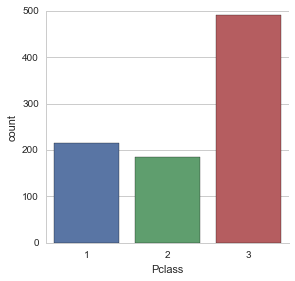

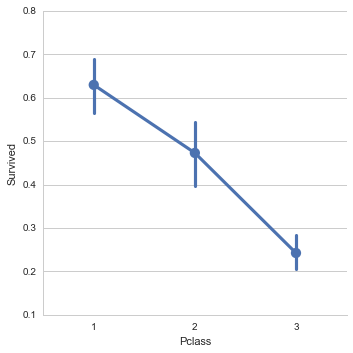

In [18]:
#Pclass
sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])       #tell the passengers in each class
sns.factorplot('Pclass','Survived',order=[1,2,3],data=titanic_df,size=5)  #tells the passenger in each class survive

In [19]:
#create dummy variables for pclass column , and drop 3rd class as it have least number of 
#surrvival
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [20]:
x_train = titanic_df.drop("Survived",axis=1)
y_train = titanic_df["Survived"]
x_test = test_df.drop("PassengerId",axis=1).copy()

In [27]:
print x_train

     Age  SibSp  Parch  Fare    C    Q  Child  Female  Family  Class_1  \
0     22      1      0     7  0.0  0.0    0.0     0.0     0.0      0.0   
1     38      1      0    71  1.0  0.0    0.0     1.0     1.0      1.0   
2     26      0      0     7  0.0  0.0    0.0     1.0     1.0      0.0   
3     35      1      0    53  0.0  0.0    0.0     1.0     1.0      1.0   
4     35      0      0     8  0.0  0.0    0.0     0.0     0.0      0.0   
5     36      0      0     8  0.0  1.0    0.0     0.0     0.0      0.0   
6     54      0      0    51  0.0  0.0    0.0     0.0     0.0      1.0   
7      2      3      1    21  0.0  0.0    1.0     0.0     0.0      0.0   
8     27      0      2    11  0.0  0.0    0.0     1.0     1.0      0.0   
9     14      1      0    30  1.0  0.0    1.0     0.0     1.0      0.0   
10     4      1      1    16  0.0  0.0    1.0     0.0     1.0      0.0   
11    58      0      0    26  0.0  0.0    0.0     1.0     1.0      1.0   
12    20      0      0     8  0.0  0.0

In [22]:
print x_test

     Age  SibSp  Parch  Fare    C    Q  Child  Female  Family  Class_1  \
0     34      0      0     7  0.0  1.0    0.0     0.0   892.0      0.0   
1     47      1      0     7  0.0  0.0    0.0     1.0   893.0      0.0   
2     62      0      0     9  0.0  1.0    0.0     0.0   894.0      0.0   
3     27      0      0     8  0.0  0.0    0.0     0.0   895.0      0.0   
4     22      1      1    12  0.0  0.0    0.0     1.0   896.0      0.0   
5     14      0      0     9  0.0  0.0    1.0     0.0   897.0      0.0   
6     30      0      0     7  0.0  1.0    0.0     1.0   898.0      0.0   
7     26      1      1    29  0.0  0.0    0.0     0.0   899.0      0.0   
8     18      0      0     7  1.0  0.0    0.0     1.0   900.0      0.0   
9     21      2      0    24  0.0  0.0    0.0     0.0   901.0      0.0   
10    41      0      0     7  0.0  0.0    0.0     0.0   902.0      0.0   
11    46      0      0    26  0.0  0.0    0.0     0.0   903.0      1.0   
12    23      1      0    82  0.0  0.0

In [23]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = logreg.predict(x_test)
logreg.score(x_train,y_train)

1.0

In [26]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

1.0